The state, ie: temperature at some position $\bold{x}$ at some time $t$.
$$ u(\bold{x},t) $$ 

The state derivative is the heat equation:
$$\frac{\partial u}{\partial t} = \alpha \nabla^2 u $$

where

$u$ = temperature

$\alpha$ = thermal diffusivity

$t$ = time

Only considering 1-dimension:
$$ \nabla^2 u = \frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1}^m - 2u_i^m + u_{i-1}^m}{\Delta x^2}$$

where $m$ represents a given time, and $i$ represents spatial discretization. All together:

$$ \therefore \frac{\partial u}{\partial t} = \alpha \left( \frac{u_{i+1}^m - 2u_i^m + u_{i-1}^m}{\Delta x^2} \right) $$


The inital conditions will be defined as follows:

$ u(x,0) = 20$ for $ 0 \lt x \lt L $, where L is the total length of the rod

$ u(0, t) = 80 $ for all t

$ u(L, t) = 20 $ for all t

In [1]:
# Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

In [2]:
def dudt(t, u, *args): # heat equation
    alpha = args[0]
    dx = args[1]
    A = args[2]
    u[0] = 500 # right boundary condition (constant temp)
    u[-1] = 500 # right boundary condition (constant temp)
    
    return (alpha/dx**2) * np.matmul(A, u.T)

# set up spatial discretization:
n_space = 200 # number of grid elements
x = np.linspace(0, 1, n_space) # spatial array
dx = 1./n_space # space-step

t0 = 0 # start time
tf = 5000 # stop time

# Initialize
u = np.ones((n_space))*273.15 # all elements of beam start at 20C
alpha = 6.4E-5 # [m^2/s] 6061-T6 src: https://www.engineersedge.com/heat_transfer/thermal_diffusivity_table_13953.htm

$$ \frac{\partial \bold{u}}{\partial t} = \frac{\alpha}{\Delta x^2}

\begin{bmatrix}
-2 & 1 & 0 & \dots & 0\\
1 & -2 & 1 & \ddots & 0\\
0 & 1 & -2 & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2 

\end{bmatrix}
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
\vdots \\
u_n
\end{bmatrix}
$$

In [3]:
A = (np.diag(np.ones(n_space-1), k=1) + np.diag(-2*np.ones(n_space)) + np.diag(1*np.ones(n_space-1), k=-1))
res = sp.integrate.solve_ivp(dudt, (t0, tf), u, args=(alpha, dx, A))
t = res.t
y = res.y

Text(0.5, 1.0, 'Heating of Aluminum Beam')

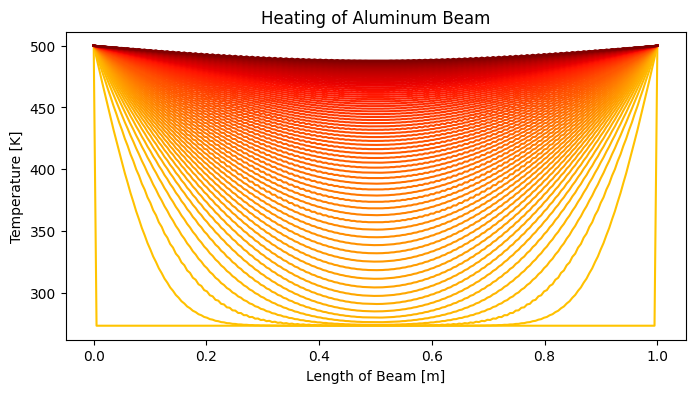

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

colors = pl.cm.jet(np.linspace(0.7,1,len(t)))

for i in range(len(t)):
    if i % 200 == 0:
        ax.plot(x, y.T[i, :], color=colors[i])

ax.set_ylabel("Temperature [K]")
ax.set_xlabel("Length of Beam [m]")
ax.set_title("Heating of Aluminum Beam")
